In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv(r"D:\ml projects\collegePlace.csv")

In [3]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.shape

(2966, 8)

In [5]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [6]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2966.0,21.485840,1.324933,19.0,21.0,21.0,22.0,30.0
Internships,2966.0,0.703641,0.740197,0.0,0.0,1.0,1.0,3.0
CGPA,2966.0,7.073837,0.967748,5.0,6.0,7.0,8.0,9.0
Hostel,2966.0,0.269049,0.443540,0.0,0.0,0.0,1.0,1.0
HistoryOfBacklogs,2966.0,0.192178,0.394079,0.0,0.0,0.0,0.0,1.0
PlacedOrNot,2966.0,0.552596,0.497310,0.0,0.0,1.0,1.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

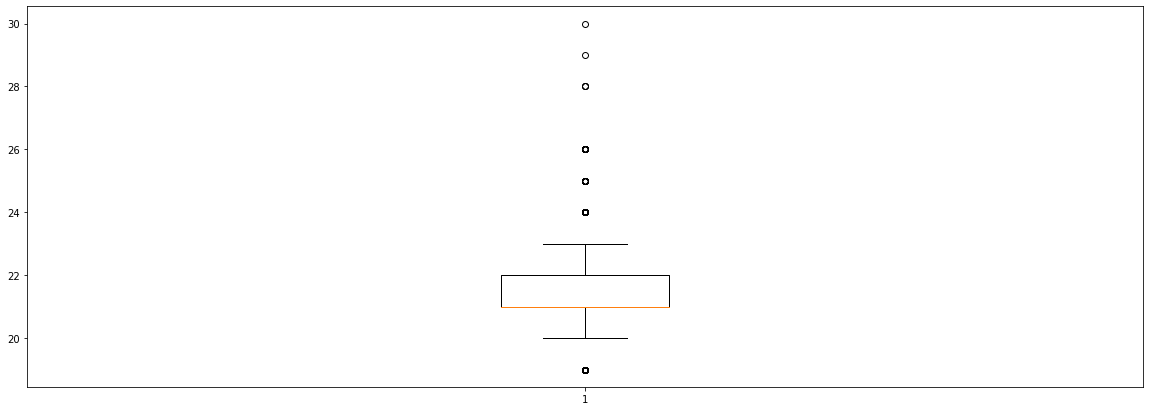

In [10]:
fig = plt.figure(figsize =(20, 7))
plt.boxplot (df["Age"])
plt.show()

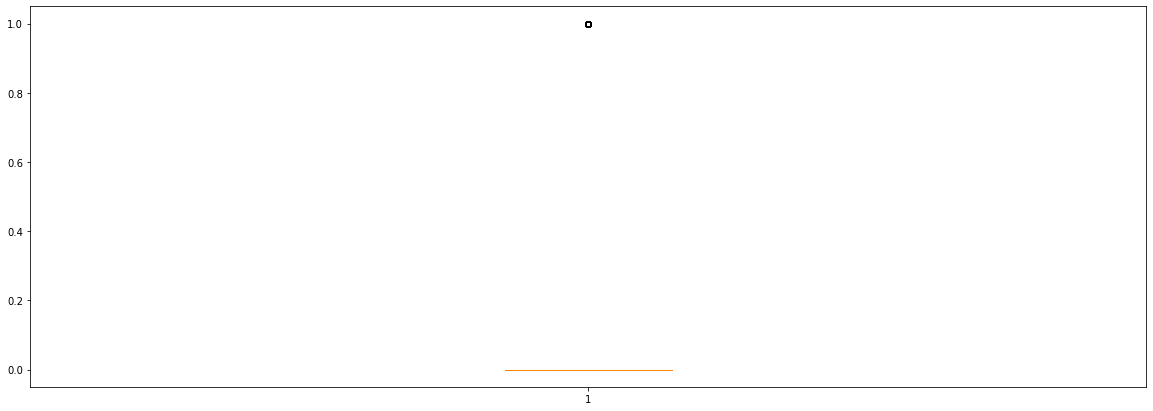

In [11]:
fig = plt.figure(figsize =(20, 7))
plt.boxplot (df["HistoryOfBacklogs"])
plt.show()

In [12]:
df.duplicated().sum()

1829

In [13]:
df['Gender'].value_counts()


Male      2475
Female     491
Name: Gender, dtype: int64

In [14]:
def outlier_limits_count(datacolumn):
    lowerbound,upperbound = outliers(datacolumn)
    no_of_outlier = len(datacolumn[(datacolumn < lowerbound) | (datacolumn > upperbound)])
    return lowerbound,upperbound,no_of_outlier

def treat_outliers(datacolumn):
    lowerbound,upperbound,no_of_outlier = outlier_limits_count(datacolumn)
    while(no_of_outlier > 0):
        tot_row_datacolumn = len(datacolumn)
        print('No of Outliers found: {0} from total record: {1} ', no_of_outlier,tot_row_datacolumn)
        # update with median value if outlier exists
        datacolumn.mask((datacolumn < lowerbound),datacolumn.median(),inplace=True)
        datacolumn.mask((datacolumn > upperbound),datacolumn.median(),inplace=True)
        lowerbound,upperbound,no_of_outlier = outlier_limits_count(datacolumn)
    else:
        print(' No Outliers found in the column')

In [15]:
def outliers(q3,q1,columname):
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    new=df[df[columname].between(ll,ul)]
    mean1=new[columname].median()
    df.loc[df[columname]<ll,columname]=mean1
    df.loc[df[columname]>ul,columname]=mean1
    return(df)

In [16]:
outliers(22.000000,21.000000,'Age')

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


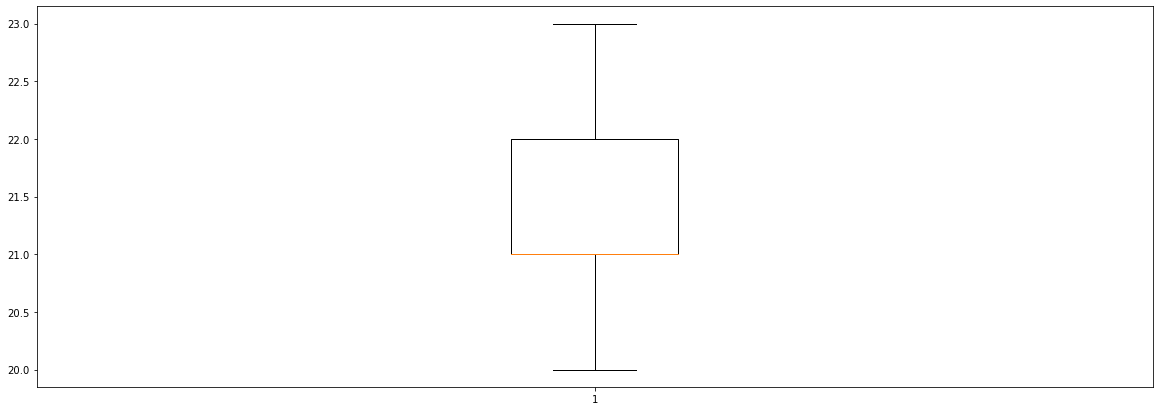

In [17]:
fig = plt.figure(figsize =(20, 7))
plt.boxplot (df["Age"])
plt.show()

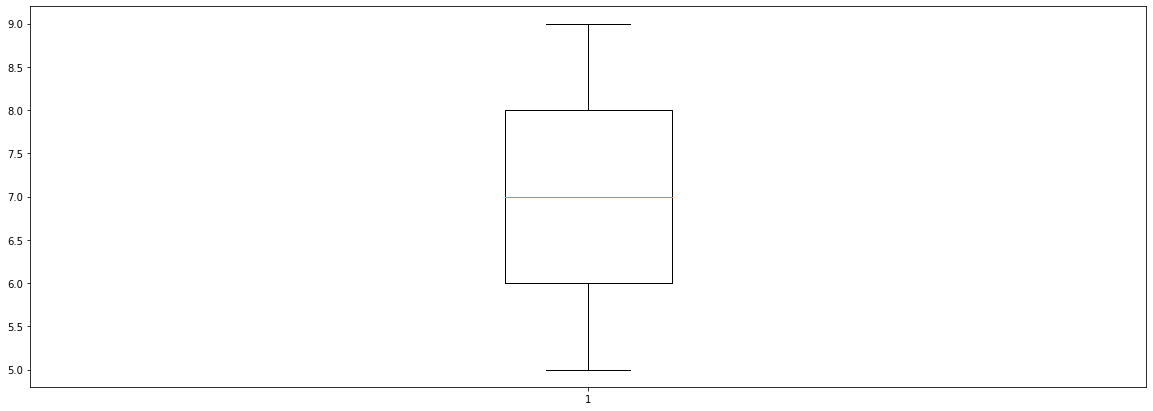

In [18]:
fig = plt.figure(figsize =(20, 7))
plt.boxplot (df["CGPA"])
plt.show()

In [19]:
n = 'Gender'
df_ohe = df.copy()
label_1 = pd.get_dummies(df_ohe,prefix = n ,columns=[n],drop_first=False)
label_1.insert(loc=1, column=n, value=df[n].values)
label_1.drop([n],axis = 1,inplace = True)
label_1

,Age,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male
0,22,Electronics And Communication,1,8,1,1,1,0,1
1,21,Computer Science,0,7,1,1,1,1,0
2,22,Information Technology,1,6,0,0,1,1,0
3,21,Information Technology,0,8,0,1,1,0,1
4,22,Mechanical,0,8,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
2961,23,Information Technology,0,7,0,0,0,0,1
2962,23,Mechanical,1,7,1,0,0,0,1
2963,22,Information Technology,1,7,0,0,0,0,1
2964,22,Computer Science,1,7,0,0,0,0,1


In [20]:
n = 'Stream'
df_ohe = df.copy()
label_2 = pd.get_dummies(label_1,prefix = n ,columns=[n],drop_first=False)
label_2.insert(loc=1, column=n, value=df[n].values)
label_2.drop([n],axis = 1,inplace = True)
label_2

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,0,1,0,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,1,0,0,0,0
2,22,1,6,0,0,1,1,0,0,0,0,0,1,0
3,21,0,8,0,1,1,0,1,0,0,0,0,1,0
4,22,0,8,1,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,23,0,7,0,0,0,0,1,0,0,0,0,1,0
2962,23,1,7,1,0,0,0,1,0,0,0,0,0,1
2963,22,1,7,0,0,0,0,1,0,0,0,0,1,0
2964,22,1,7,0,0,0,0,1,0,1,0,0,0,0


In [21]:
label_2=label_2[['Age','Gender_Female','Gender_Male','Stream_Civil','Stream_Computer Science','Stream_Electrical','Stream_Electronics And Communication',
                'Stream_Information Technology','Stream_Mechanical','Internships','CGPA','Hostel','HistoryOfBacklogs','PlacedOrNot']]

In [22]:
label_2

,Age,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,1,0,0,0,1,0,0,1,8,1,1,1
1,21,1,0,0,1,0,0,0,0,0,7,1,1,1
2,22,1,0,0,0,0,0,1,0,1,6,0,0,1
3,21,0,1,0,0,0,0,1,0,0,8,0,1,1
4,22,0,1,0,0,0,0,0,1,0,8,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,23,0,1,0,0,0,0,1,0,0,7,0,0,0
2962,23,0,1,0,0,0,0,0,1,1,7,1,0,0
2963,22,0,1,0,0,0,0,1,0,1,7,0,0,0
2964,22,0,1,0,1,0,0,0,0,1,7,0,0,0


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
X = label_2.iloc[:, :-1].values
y = label_2.iloc[:, -1].values

In [25]:
X

array([[22,  0,  1, ...,  8,  1,  1],
       [21,  1,  0, ...,  7,  1,  1],
       [22,  1,  0, ...,  6,  0,  0],
       ...,
       [22,  0,  1, ...,  7,  0,  0],
       [22,  0,  1, ...,  7,  0,  0],
       [23,  0,  1, ...,  8,  0,  0]], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[20  1  0 ...  7  0  0]
 [21  0  1 ...  6  0  1]
 [22  0  1 ...  5  0  0]
 ...
 [22  0  1 ...  7  0  1]
 [22  0  1 ...  8  0  0]
 [22  0  1 ...  7  0  0]]
[0 1 0 ... 0 1 0]
[[21  0  1 ...  6  0  1]
 [22  0  1 ...  7  0  1]
 [22  0  1 ...  6  0  0]
 ...
 [21  0  1 ...  7  0  1]
 [22  0  1 ...  8  1  1]
 [21  0  1 ...  7  0  0]]
[0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1
 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)


[[-1.69188211  2.27925121 -2.27925121 ... -0.07030723 -0.60228324
  -0.49803204]
 [-0.41029294 -0.43874058  0.43874058 ... -1.09901299 -0.60228324
   2.00790294]
 [ 0.87129624 -0.43874058  0.43874058 ... -2.12771875 -0.60228324
  -0.49803204]
 ...
 [ 0.87129624 -0.43874058  0.43874058 ... -0.07030723 -0.60228324
   2.00790294]
 [ 0.87129624 -0.43874058  0.43874058 ...  0.95839853 -0.60228324
  -0.49803204]
 [ 0.87129624 -0.43874058  0.43874058 ... -0.07030723 -0.60228324
  -0.49803204]]
[[-0.41029294 -0.43874058  0.43874058 ... -1.09901299 -0.60228324
   2.00790294]
 [ 0.87129624 -0.43874058  0.43874058 ... -0.07030723 -0.60228324
   2.00790294]
 [ 0.87129624 -0.43874058  0.43874058 ... -1.09901299 -0.60228324
  -0.49803204]
 ...
 [-0.41029294 -0.43874058  0.43874058 ... -0.07030723 -0.60228324
   2.00790294]
 [ 0.87129624 -0.43874058  0.43874058 ...  0.95839853  1.66034838
   2.00790294]
 [-0.41029294 -0.43874058  0.43874058 ... -0.07030723 -0.60228324
  -0.49803204]]


In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
print(classifier.predict(sc.transform([[22,1,0,0,0,0,0,1,0,1,6,0,0]])))

[1]


In [30]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [0 0]]


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[310  20]
 [ 84 328]]


0.8598382749326146